In [1]:
# Run this cell to install necessary packages
!uv pip install -qU langchain\
    langchain-google-genai langchain-openai\
    langchain-huggingface langchain-community\
    langgraph duckduckgo-search beautifulsoup4

!uv pip install -U huggingface_hub
!uv pip install -U ddgs
!uv pip install -qU pytrends pandas

Using Python 3.12.12 environment at: /usr
Resolved 17 packages in 101ms
Prepared 1 package in 82ms
Uninstalled 1 package in 28ms
Installed 1 package in 6ms
 - huggingface-hub==0.36.0
 + huggingface-hub==1.3.2
Using Python 3.12.12 environment at: /usr
Resolved 17 packages in 115ms
Prepared 3 packages in 24ms
Installed 3 packages in 4ms
 + ddgs==9.10.0
 + fake-useragent==2.2.0
 + socksio==1.0.0


In [3]:
import os
from google.colab import userdata
if "OPENROUTER_API_KEY" not in os.environ:
    os.environ["OPENROUTER_API_KEY"] = userdata.get('OPENROUTER_API_KEY')


In [8]:
from langchain_openai import ChatOpenAI
from os import getenv

model_name = "openai/gpt-oss-120b"
llm = ChatOpenAI(
    api_key=getenv("OPENROUTER_API_KEY"),
    base_url="https://openrouter.ai/api/v1",
    model=model_name,
    # default_headers={
    #     "HTTP-Referer": getenv("YOUR_SITE_URL"),  # Optional. Site URL for rankings on openrouter.ai.
    #     "X-Title": getenv("YOUR_SITE_NAME"),  # Optional. Site title for rankings on openrouter.ai.
    # }
)

In [ ]:
for chunk in llm.stream(
    input=[
        {"role": "user", "content": "what is ML and it APP"},
    ]
):
    latest_message = chunk.content
    print(latest_message)

In [15]:
from langchain.agents import AgentState
from langchain.agents import create_agent
## tools_and_prompts.py
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.tools import tool

# --- Tools ---

@tool
def web_search(query: str) -> str:
    """Useful for searching the internet for current events, competitors, and market data."""
    # logger.info(f"Tool Call: Search -> {query}")
    search = DuckDuckGoSearchRun()
    return search.invoke(query)


agent = create_agent(
    llm,
    tools=[web_search],
)

In [16]:
for chunk in agent.stream({
    "messages": [{"role": "user", "content": "Search for AI news and summarize the findings"}]
}, stream_mode="values"):
    # Each chunk contains the full state at that point
    latest_message = chunk["messages"][-1]
    if latest_message.content:
        print(f"Agent: {latest_message.content}")
    elif latest_message.tool_calls:
        print(f"Calling tools: {[tc['name'] for tc in latest_message.tool_calls]}")

Agent: Search for AI news and summarize the findings
Calling tools: ['web_search']
Agent: Explore the latest artificial intelligence news with Reuters - from AI breakthroughs and technology trends to regulation, ethics, business and global impact. Artificial Intelligence News . Everything on AI including futuristic robots with artificial intelligence, computer models of human intelligence and more. AI News delivers the latest updates in artificial intelligence, machine learning, deep learning, enterprise AI , and emerging tech worldwide. Artificial Intelligence News Funding to AI -related companies topped $100 billion in 2024 — up more than 80% year over year — according to Crunchbase data. That surpasses every year in the past decade, including the peak venture funding year of 2021. All told, nearly a third of all global venture funding went to companies in AI -related fields in 2024 , making artificial intelligence by far ... Over the past 24 hours, several interesting AI -related ne

In [31]:
from typing import Any, TypedDict, List, Optional
from pydantic import BaseModel, Field

# --- Analysis Output Types ---
class Persona(BaseModel):
    name: str = Field(..., description="Short memorable persona name")
    role: str = Field(..., description="Job title or role")
    industry: str = Field(..., description="Industry or vertical")
    company_size: str = Field(..., description="Startup, SMB, Mid-market, Enterprise")
    decision_power: str = Field(..., description="Decision maker, influencer, user")

    pain_points: List[str]
    motivations: List[str]
    main_objections: List[str]

    acquisition_channels: List[str] = Field(
        ..., description="Where this persona can realistically be reached"
    )

    where_they_hang_out: List[str]

    evidence_sources: List[str] = Field(
        ..., description="URLs, forums, blogs, or platforms used to infer this persona"
    )

class MarketAnalysisOutput(BaseModel):
    personas: List[Persona]
    global_reasoning: List[str] = Field(
        ..., description="Market-level insights and patterns observed"
    )

from langchain.agents import create_agent
from langchain.agents.structured_output import ToolStrategy

agent = create_agent(
    llm,
    tools=[web_search],
    response_format=ToolStrategy(MarketAnalysisOutput)
)

In [32]:
analysis = agent.invoke({
    "messages": [{"role": "user", "content": "search about the drive apps in morocco market"}]
})

In [33]:
analysis['structured_response']

KeyError: 'structured_response'

In [ ]:
for chunk in agent.stream({
    "messages": [{"role": "user", "content": "search about the drive apps in morocco market"}]
}, stream_mode="values"):
    # Each chunk contains the full state at that point
    latest_message = chunk["messages"][-1]
    if latest_message.content:
        print(f"Agent: {latest_message.content}")
    elif latest_message.tool_calls:
        print(f"Calling tools: {[tc['name'] for tc in latest_message.tool_calls]}")

In [35]:
from typing import Any, TypedDict, List, Optional
from pydantic import BaseModel, Field

# --- Analysis Output Types ---
class Persona(BaseModel):
    name: str = Field(..., description="Short memorable persona name")
    role: str = Field(..., description="Job title or role")
    industry: str = Field(..., description="Industry or vertical")
    company_size: str = Field(..., description="Startup, SMB, Mid-market, Enterprise")
    decision_power: str = Field(..., description="Decision maker, influencer, user")

    pain_points: List[str]
    motivations: List[str]
    main_objections: List[str]

    acquisition_channels: List[str] = Field(
        ..., description="Where this persona can realistically be reached"
    )

    where_they_hang_out: List[str]

    evidence_sources: List[str] = Field(
        ..., description="URLs, forums, blogs, or platforms used to infer this persona"
    )

class MarketAnalysisOutput(BaseModel):
    personas: List[Persona]
    global_reasoning: List[str] = Field(
        ..., description="Market-level insights and patterns observed"
    )

from langchain.agents import create_agent
from langchain.agents.structured_output import ProviderStrategy

agent = create_agent(
    llm,
    tools=[web_search],
    response_format=ProviderStrategy(MarketAnalysisOutput)
)

In [37]:
analysis = agent.invoke({
    "messages": [{"role": "user", "content": "search about the drive apps in morocco market"}]
})

In [38]:
output = analysis['structured_response']

In [39]:
type(output)

__main__.MarketAnalysisOutput

In [57]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=getenv("OPENROUTER_API_KEY"),
)

# Generate an image
response = client.chat.completions.create(
  model="bytedance-seed/seedream-4.5",
  messages=[
          {
            "role": "user",
            "content": "Generate a beautiful sky with the name of mohamed in arabic at the sky by cloud"
            # "content": "Generate a beautiful sunset over mountains"
          }
        ],
  extra_body={"modalities": ["image", "text"]}
)

# The generated image will be in the assistant message
response = response.choices[0].message
if response.images:
  for image in response.images:
    image_url = image['image_url']['url']  # Base64 data URL
    print(f"Generated image: {image_url[:50]}...")

Generated image: data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD...


In [58]:
import base64

# Get the data URL
image_url = image['image_url']['url']

# Split header and base64 data
header, base64_data = image_url.split(",", 1)

# Decode base64 to bytes
image_bytes = base64.b64decode(base64_data)

# Save to file
with open("sunset.jpg", "wb") as f:
    f.write(image_bytes)

print("✅ Image saved as sunset.jpg")


✅ Image saved as sunset.jpg


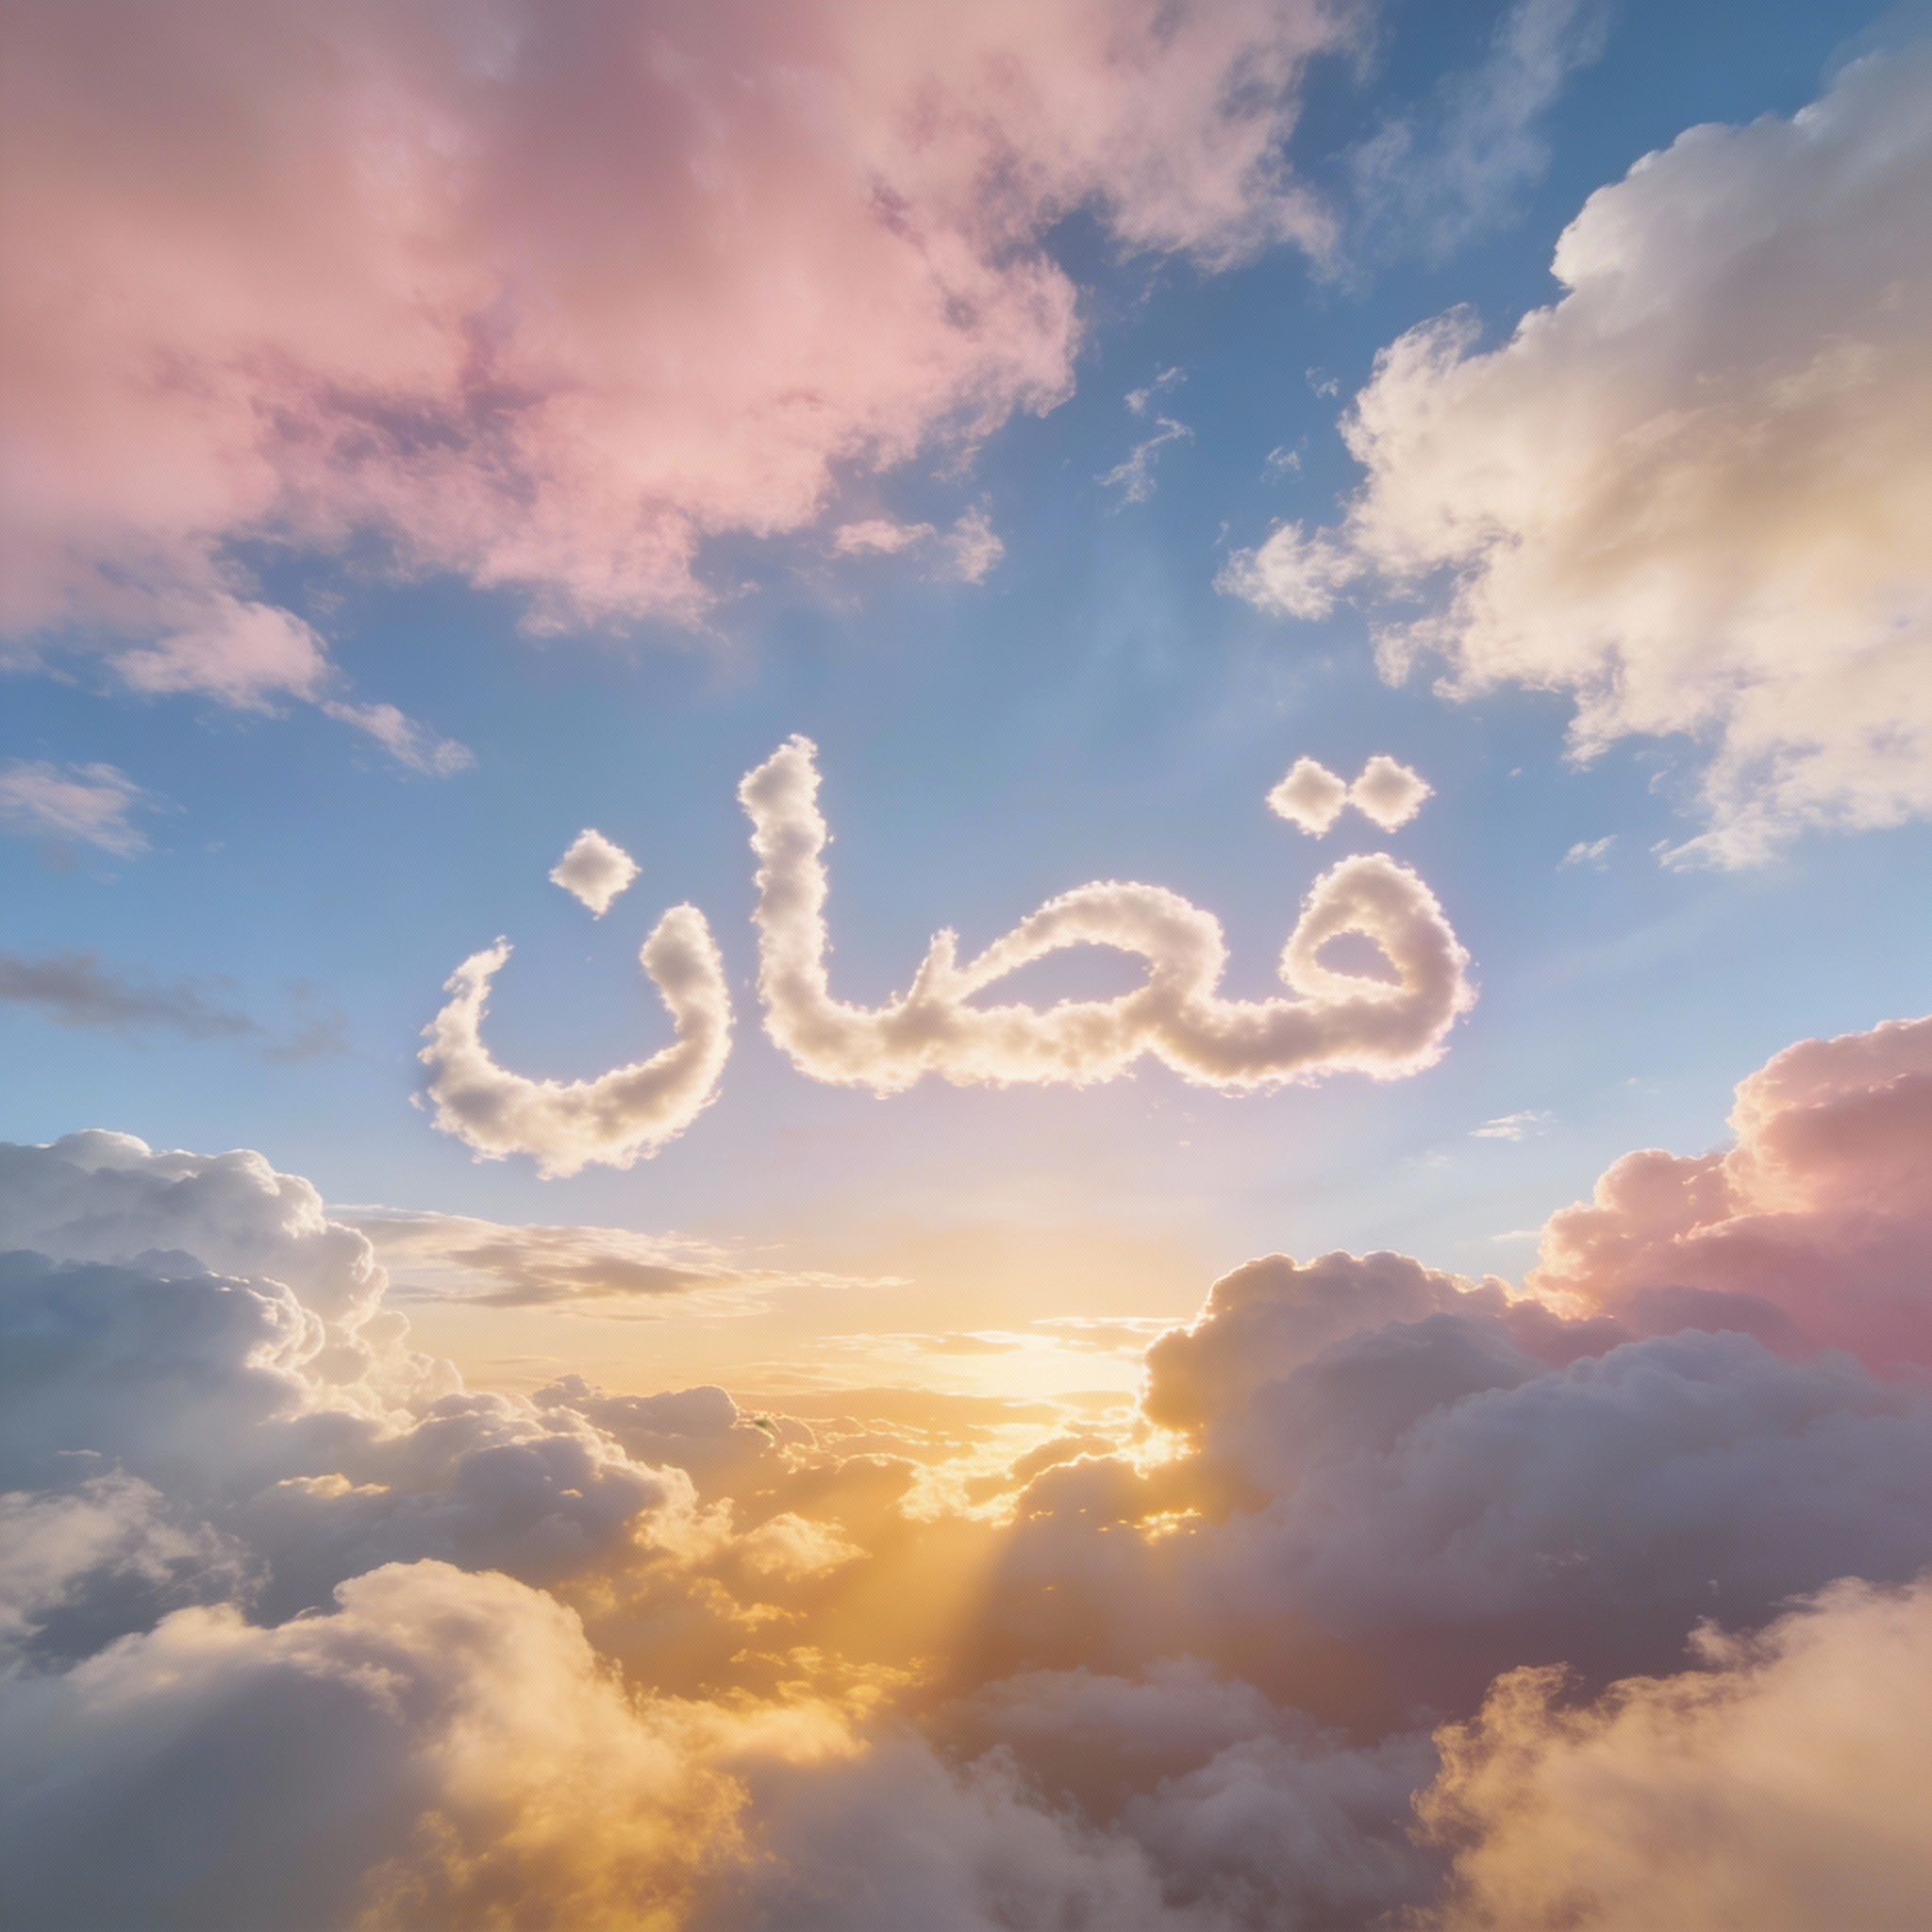

In [59]:
from IPython.display import Image
Image('sunset.jpg')

In [ ]:
import base64
import os
from openai import OpenAI


def generate_image_with_openrouter(
    messages: dict,
    output_dir: str,
    image_name: str = "generated_image",
    model: str = "bytedance-seed/seedream-4.5",
    size: str = "1024x1024",
) -> str:
    """
    Generate an image using an OpenRouter image model and save it to disk.

    Args:
        mmessages (dict): Description of the image to generate as a dict of role and content.
        output_path (str): Path where the image will be saved (e.g. "images/sunset.jpg").
        model (str): OpenRouter image model.
        size (str): Image size (e.g. "512x512", "1024x1024").

    Returns:
        str: Path to the saved image.
    """

    client = OpenAI(
        base_url="https://openrouter.ai/api/v1",
        api_key=getenv("OPENROUTER_API_KEY"),
    )

    result = client.chat.completions.create(
        model=model,
        messages=messages,
        extra_body={"modalities": ["image", "text"]}
    )

    # Ensure directory exists
    os.makedirs(os.path.dirname(output_dir), exist_ok=True)

    if response.images:
        for i, image in enumerate(response.images):
            os.makedirs(os.path.dirname(output_dir + f"/{image_name}_{i}.jpg"), exist_ok=True)
            image_url = image['image_url']['url']  # Base64 data URL
            header, base64_data = image_url.split(",", 1)
            image_bytes = base64.b64decode(base64_data)
            with open(output_dir + f"/{image_name}_{i}.jpg", "wb") as f:
                f.write(image_bytes)




    # Save image
    # with open(output_path, "wb") as f:
    #     f.write(image_bytes)
    number_of_images = len(response.images)
    base_url_to_image = output_dir + f"/{image_name}_"
    image_type = '.jpg'

    return {
        "number_of_images":number_of_images,
        "base_url_to_image":base_url_to_image,
        "image_type":image_type
    }

In [64]:
path = generate_image_with_openrouter(
    messages=[{
        "role": "user",
        "content": "generate for me messi doing marketing to coca cola"
    }],
    output_dir="outputs",
)



print(f"Image saved at: {path}")


APIStatusError: Error code: 402 - {'error': {'message': 'Insufficient credits. This account never purchased credits. Make sure your key is on the correct account or org, and if so, purchase more at https://openrouter.ai/settings/credits', 'code': 402}}